<H1>CLUSTERING AND PREDICTIONS ON THE IRIS  DATASET</H1>

<h2>Necessary imports</h2>

In [1]:
import matplotlib.pyplot as plot
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np


<h2>Loading the data

In [2]:
irisDataset = load_iris()
#print(irisDataset)

iris_df = pd.DataFrame(irisDataset.data, columns=irisDataset.feature_names[:])
iris_df["Targets"] = irisDataset.target[:]


print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Targets  
0          0

In [3]:
sepal_length = iris_df["sepal length (cm)"]
sepal_width = iris_df["sepal width (cm)"]
petal_length = iris_df["petal length (cm)"]
petal_width = iris_df["petal width (cm)"]

<h2>Plotting the data, 2 features at a time

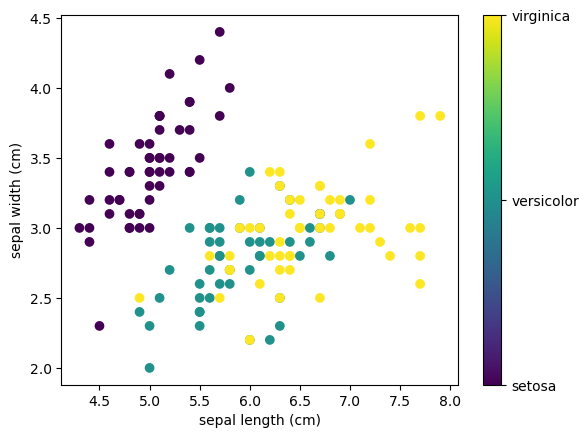

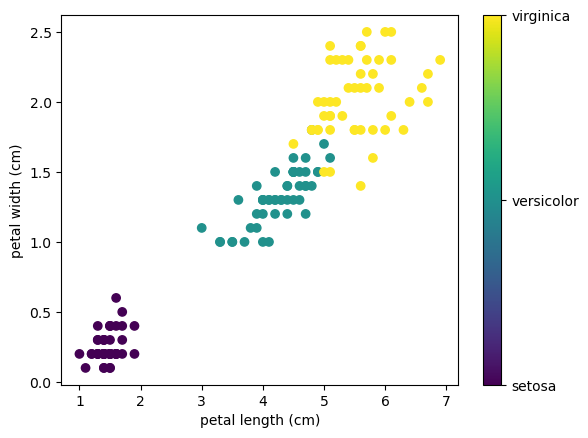

In [4]:
formatterplot = plot.FuncFormatter(lambda index, *args: irisDataset.target_names[int(index)])

#plotting first plot (sepal_width vs sepal_length)
plot.figure(1)
plot.scatter(sepal_length, sepal_width, c=irisDataset.target)
plot.xlabel("sepal length (cm)")
plot.ylabel("sepal width (cm)")
plot.colorbar(ticks=[0, 1, 2], format=formatterplot)

#plotting second plot (petal_width vs petal_length) 
plot.figure(2)
plot.scatter(petal_length, petal_width, c=irisDataset.target)
plot.xlabel("petal length (cm)")
plot.ylabel("petal width (cm)")
plot.colorbar(ticks=[0, 1, 2], format=formatterplot)  #formats colours as per 'target' and 'target_names' keys of the dataset

#showing the plots
plot.show()

<H2>Splitting the data and importing the model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Data_train, Data_test, Target_train, Target_test = train_test_split(irisDataset["data"], irisDataset["target"],
                                                                    random_state=0)

In [6]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(Data_train, Target_train)

print("The model was tested and got {:.2f}% of its predictions right.".format(knn.score(Data_test, Target_test) * 100))


The model was tested and got 97.37% of its predictions right.


<H2>Plotting accuracy vs values of K

In [7]:
x_coords = [] #value of K
y_coords = [] #accuracy

for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Data_train, Target_train)
    x_coords.append(k)
    y_coords.append(knn.score(Data_test, Target_test)*100)



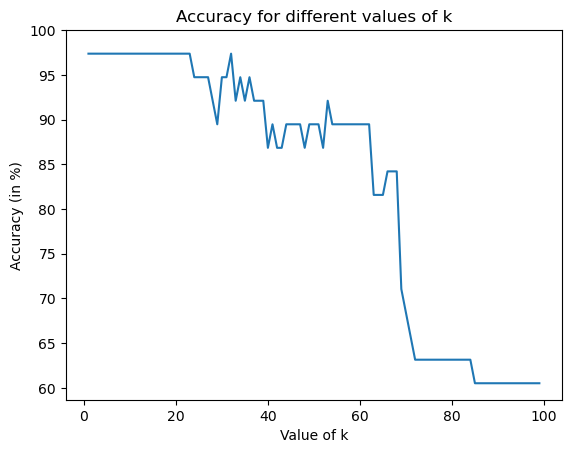

In [8]:
plot.figure()
plot.plot(x_coords, y_coords)
plot.xlabel("Value of k")
plot.ylabel("Accuracy (in %)")
plot.ylim(top = 100)
plot.title("Accuracy for different values of k")
plot.show()

<H2>Finding and plotting decision boundaries

In [9]:
def listify(list1, list2):
    new = []
    for i in range(0, len(list1)):
        temp = [list1[i], list2[i]]
        new.append(temp)
    return new

petals = listify(petal_length, petal_width)
petals = np.array(petals)

petalData_train, petalData_test, petalTarget_train, petalTarget_test = train_test_split(petals,
                                                                    irisDataset["target"], random_state=0)

knn_boundaries = KNeighborsClassifier(n_neighbors=5)
knn_boundaries.fit(petalData_train, petalTarget_train)

length_min, length_max = min(petal_length) - 0.1, max(petal_length) + 0.1
width_min, width_max = min(petal_width) - 0.1, max(petal_width) + 0.1

#numpy.meshgrid() used to return coordinate matrices
xx, yy = np.meshgrid(np.linspace(length_min, length_max, 100), np.linspace(width_min, width_max, 100))
boundaries = knn_boundaries.predict(np.c_[xx.ravel(), yy.ravel()])
boundaries = boundaries.reshape(xx.shape)


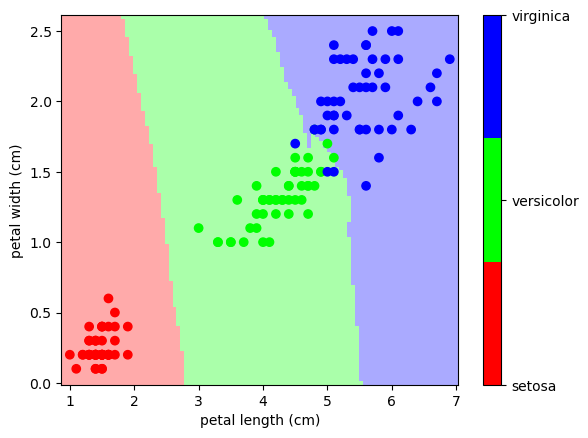

In [10]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plot.figure(2)
plot.pcolormesh(xx, yy, boundaries, cmap = cmap_light)
plot.scatter(petal_length, petal_width, c=irisDataset.target, cmap=cmap_bold)
plot.xlabel("petal length (cm)")
plot.ylabel("petal width (cm)")
plot.colorbar(ticks=[0, 1, 2], format=formatterplot)
plot.show()

<h2>Clustering using the K-means algorithm

c:\Users\adity\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


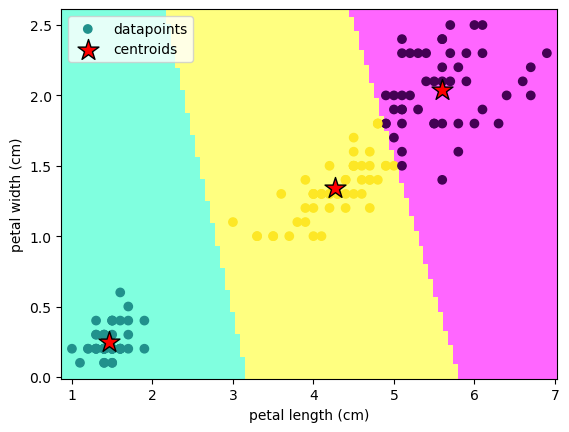

In [11]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300)
labels = km_model.fit_predict(petals)

xx, yy = np.meshgrid(np.linspace(length_min, length_max, 100), np.linspace(width_min, width_max, 100))
boundaries = km_model.predict(np.c_[xx.ravel(), yy.ravel()])
boundaries = boundaries.reshape(xx.shape)
#print(boundaries)

new_cmap_light = ListedColormap(["#ff66ff","#80ffdf", "#ffff80"])

plot.figure()
plot.pcolormesh(xx, yy, boundaries, cmap = new_cmap_light)
plot.scatter(petal_length, petal_width, c=labels, label='datapoints')
plot.xlabel("petal length (cm)")
plot.ylabel("petal width (cm)")
plot.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], marker='*',
            c='red', edgecolor='black', label='centroids', s=250)
plot.legend()
plot.show()